<a href="https://colab.research.google.com/github/itdhirendra/IITRoorke_DS_AIML/blob/main/Recurrent_Neural_Networks_%E2%80%93_Assignment_Submitedby_Dhirendra_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective :
Build a sentiment analysis model using Recurrent Neural Networks (RNNs) to classify IMDB movie reviews into:

- Positive sentiment

- Negative sentiment

Dataset Summary :
- IMDB movie review dataset

- Contains 25,000 labeled movie reviews.


Will use only the top 10,000 most common words and pad the reviews to have the same length.

**Data Preprocessing**

In [13]:
#import the required libarary
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

In [14]:
# 1: Load the IMDB dataset
vocab_size = 10000  # only consider the top 10,000 words
maxlen = 500        # maximum length of reviews after padding

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


In [15]:
# 2: Pad the sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


Model Building

In [16]:
# 3: Build the Sequential RNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),  # word embeddings
    SimpleRNN(32),            # RNN layer to process sequences
    Dense(1, activation='sigmoid')  # Output layer: binary classification
])

In [17]:
# 4: Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model Training

In [18]:
#  5: Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2  # 20% validation data from training set
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 192ms/step - accuracy: 0.5565 - loss: 0.6793 - val_accuracy: 0.7812 - val_loss: 0.4758
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 189ms/step - accuracy: 0.8150 - loss: 0.4243 - val_accuracy: 0.8308 - val_loss: 0.4052
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 182ms/step - accuracy: 0.8818 - loss: 0.3024 - val_accuracy: 0.8690 - val_loss: 0.3346
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 184ms/step - accuracy: 0.9169 - loss: 0.2239 - val_accuracy: 0.8480 - val_loss: 0.3688
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - accuracy: 0.8423 - loss: 0.4557 - val_accuracy: 0.7086 - val_loss: 0.5817
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 191ms/step - accuracy: 0.8554 - loss: 0.3503 - val_accuracy: 0.8166 - val_loss: 0.4531
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 187ms/step - accuracy: 0.8932 - loss: 0.2821 - val_accuracy: 0.8050 - val_loss: 0.4441
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 191ms/step - accuracy: 0.9192 - loss: 0

Evaluation

In [19]:
#  6: Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.8115 - loss: 0.4925
Test Accuracy: 0.8132


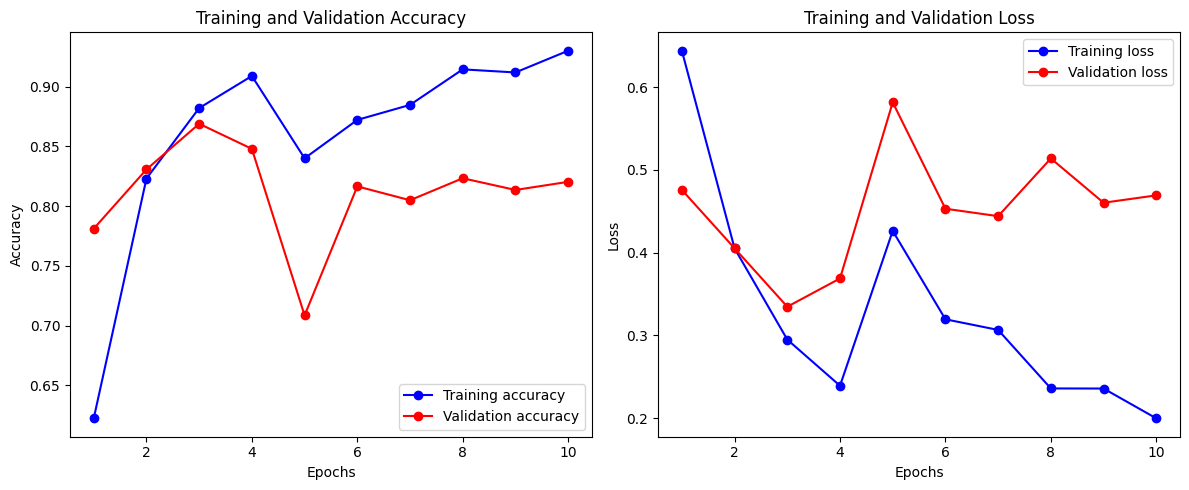

In [20]:
# 7: Plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

   # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

      # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

LSTM or GRU

In [22]:
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
# Choose between LSTM or GRU
use_lstm = True  # Change to False to use GRU instead of LSTM

# Build model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen))

if use_lstm:
    model.add(LSTM(64))  # can tune number of units
else:
    model.add(GRU(64))

model.add(Dense(1, activation='sigmoid'))

In [23]:
#  Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [24]:
#  Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2  # 20% validation data from training set
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 886ms/step - accuracy: 0.6431 - loss: 0.6063 - val_accuracy: 0.8580 - val_loss: 0.3357
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 139s 885ms/step - accuracy: 0.8957 - loss: 0.2684 - val_accuracy: 0.8720 - val_loss: 0.3038
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 139s 885ms/step - accuracy: 0.9264 - loss: 0.2017 - val_accuracy: 0.8684 - val_loss: 0.3399
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 888ms/step - accuracy: 0.9334 - loss: 0.1831 - val_accuracy: 0.8810 - val_loss: 0.3361
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 880ms/step - accuracy: 0.9498 - loss: 0.1410 - val_accuracy: 0.8758 - val_loss: 0.3543
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 129s 824ms/step - accuracy: 0.9651 - loss: 0.1079 - val_accuracy: 0.8712 - val_loss: 0.3641
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 893ms/step - accuracy: 0.9676 - loss: 0.0992 - val_accuracy: 0.8770 - val_loss: 0.4243
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 882ms/step - accuracy: 0.9736 -

In [25]:
#  Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.8542 - loss: 0.4893
Test Accuracy: 0.8543


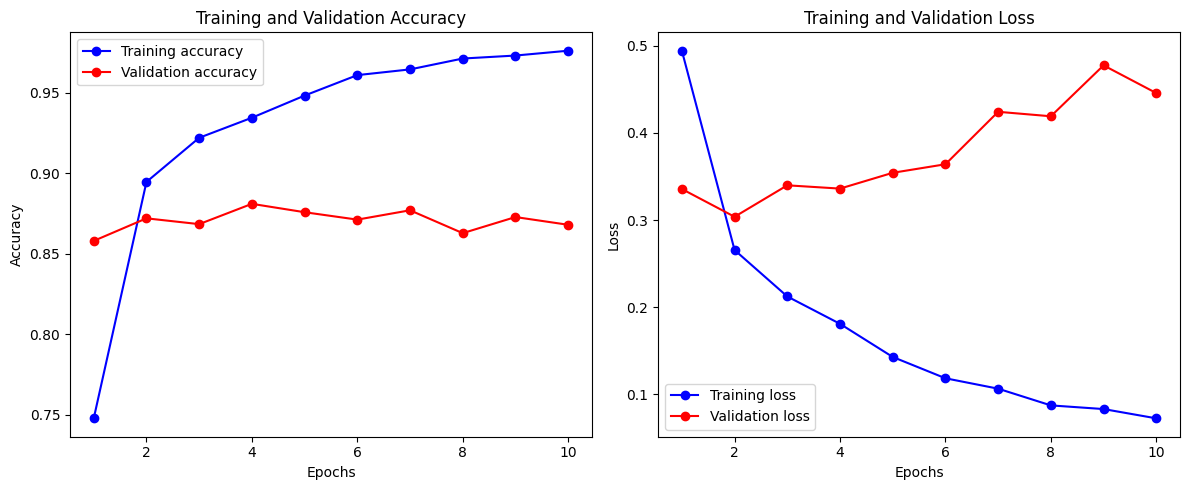

In [26]:
# Plot training history
plot_training_history(history)